In [1]:
import sys
sys.path.append('..')

In [2]:
import pandas as pd
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
def load_data(filepath='../data/no_padding/single/single-data-1731330580695044400.csv'):
    df = pd.read_csv(filepath, delimiter=';')
    # Convert concatenated bitstrings to a list of individual strings
    X = df['concatenated_bitstrings'].str.split(',').apply(lambda x: ''.join(x))
    # Convert binary strings to numpy arrays
    X = np.array([list(x) for x in X]).astype(int)
    y = df['num_excluded'].values
    return X, y

In [6]:
X, y = load_data()
print(f"Input shape: {X.shape}")
print(f"Output shape: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Input shape: (1999, 26312)
Output shape: (1999,)
Training set shape: (1599, 26312)
Test set shape: (400, 26312)


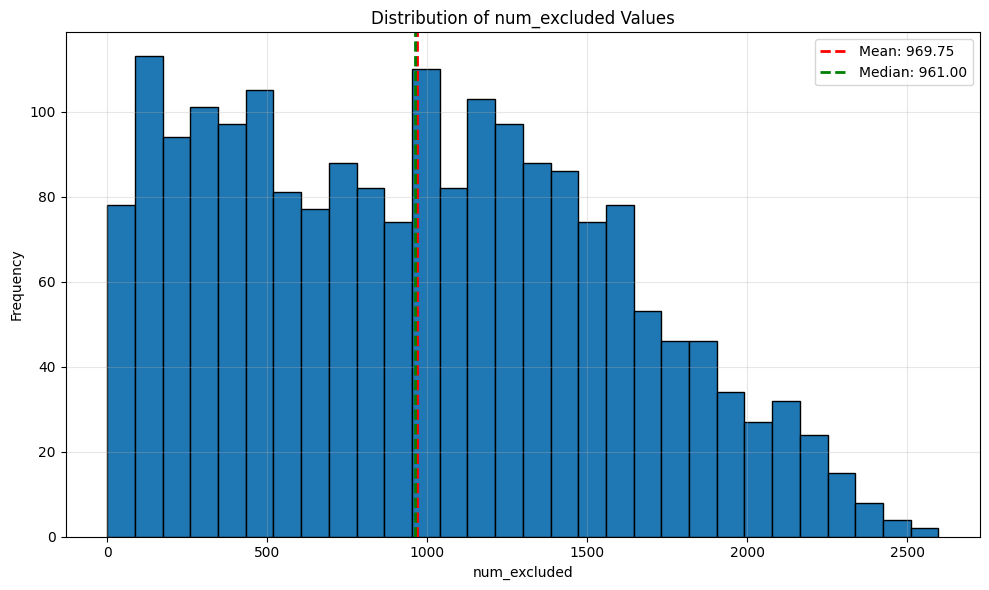

In [11]:
# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(y, bins=30, edgecolor='black')
plt.title('Distribution of num_excluded Values')
plt.xlabel('num_excluded')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Add vertical lines for mean and median
plt.axvline(np.mean(y), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {np.mean(y):.2f}')
plt.axvline(np.median(y), color='green', linestyle='dashed', linewidth=2, label=f'Median: {np.median(y):.2f}')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
def create_model(input_dim):
    model = keras.Sequential([
        keras.layers.Dense(512, activation='relu', input_shape=(input_dim,)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])
    return model

model = create_model(X_train.shape[1])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │    13,472,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,644,801 (52.05 MB)

 Trainable params: 13,644,801 (52.05 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 1159159.2500 - mae: 899.2877 - val_loss: 627260.1250 - val_mae: 629.4026
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 639779.8750 - mae: 635.9886 - val_loss: 506099.1875 - val_mae: 580.6577
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 344768.8438 - mae: 451.2050 - val_loss: 406336.1875 - val_mae: 526.7205
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 136158.6719 - mae: 283.5837 - val_loss: 407766.0312 - val_mae: 522.8561
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 63524.0742 - mae: 183.1936 - val_loss: 401317.8750 - val_mae: 517.3856
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 52188.0312 - mae: 158.9145 - val_loss: 409669.6250 - val_mae: 523.9368
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 37060.1211 - mae: 137.1339 - val_loss: 407593.8125 - val_mae: 523.9758
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 37238.6406 - mae: 134.6999

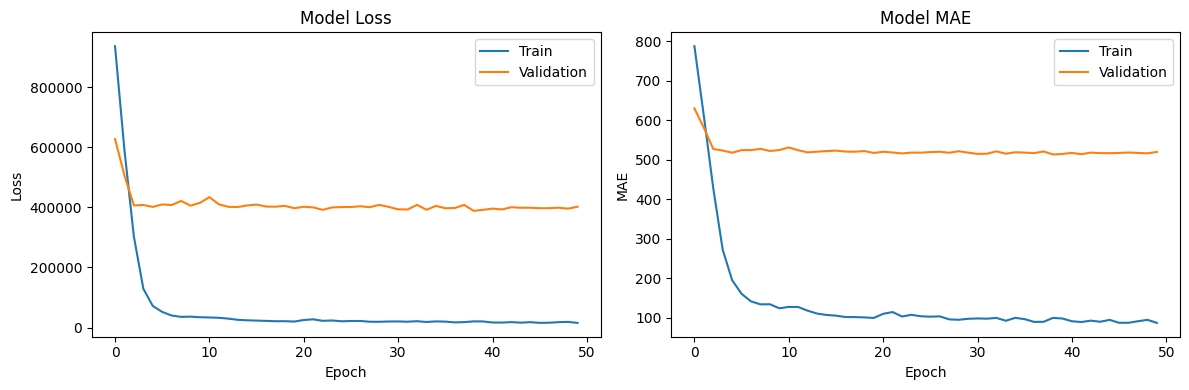

In [14]:
# Plotting training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

In [15]:
# Evaluate on test set
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

Test Loss: 473547.1250
Test MAE: 555.7139
